In [84]:
import pandas as pd
# sys.path.insert(0, 'D:\GitHub Repos\MLib in Python\MLib-in-python')
# import MLib
import warnings
warnings.filterwarnings("ignore")
import sklearn

## start

In [85]:
DFOriginal = pd.read_csv('csv-wsn-ids-ds.csv')
OutPutLabel : str = 'Attack type'
InputLabels : list = DFOriginal.columns.tolist()
InputLabels.remove(OutPutLabel)
print('Input Labels Count: ', len(InputLabels))
InputLabels

Input Labels Count:  18


[' id',
 ' Time',
 ' Is_CH',
 ' who CH',
 ' Dist_To_CH',
 ' ADV_S',
 ' ADV_R',
 ' JOIN_S',
 ' JOIN_R',
 ' SCH_S',
 ' SCH_R',
 'Rank',
 ' DATA_S',
 ' DATA_R',
 ' Data_Sent_To_BS',
 ' dist_CH_To_BS',
 ' send_code ',
 'Expaned Energy']

In [86]:
DFOriginal[OutPutLabel].value_counts().index.tolist()

['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

In [87]:
DFOriginal.dtypes

 id                   int64
 Time                 int64
 Is_CH                int64
 who CH               int64
 Dist_To_CH         float64
 ADV_S                int64
 ADV_R                int64
 JOIN_S               int64
 JOIN_R               int64
 SCH_S                int64
 SCH_R                int64
Rank                  int64
 DATA_S               int64
 DATA_R               int64
 Data_Sent_To_BS      int64
 dist_CH_To_BS      float64
 send_code            int64
Expaned Energy      float64
Attack type          object
dtype: object

In [88]:
DFOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [89]:
# Display the number of missing values in each column
DFOriginal.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

In [90]:
DFOriginal.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [91]:
# Display the number of unique values in each column
DFOriginal.nunique()

 id                 11120
 Time                 196
 Is_CH                  2
 who CH              7088
 Dist_To_CH         13956
 ADV_S                 85
 ADV_R                 31
 JOIN_S                 2
 JOIN_R               101
 SCH_S                 95
 SCH_R                  2
Rank                  100
 DATA_S               192
 DATA_R              1345
 Data_Sent_To_BS      237
 dist_CH_To_BS        305
 send_code             16
Expaned Energy      69352
Attack type             5
dtype: int64

In [92]:
print(DFOriginal.duplicated().sum())

8873


In [93]:
DFOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

array([[<Axes: title={'center': ' id'}>,
        <Axes: title={'center': ' Time'}>,
        <Axes: title={'center': ' Is_CH'}>,
        <Axes: title={'center': ' who CH'}>],
       [<Axes: title={'center': ' Dist_To_CH'}>,
        <Axes: title={'center': ' ADV_S'}>,
        <Axes: title={'center': ' ADV_R'}>,
        <Axes: title={'center': ' JOIN_S'}>],
       [<Axes: title={'center': ' JOIN_R'}>,
        <Axes: title={'center': ' SCH_S'}>,
        <Axes: title={'center': ' SCH_R'}>,
        <Axes: title={'center': 'Rank'}>],
       [<Axes: title={'center': ' DATA_S'}>,
        <Axes: title={'center': ' DATA_R'}>,
        <Axes: title={'center': ' Data_Sent_To_BS'}>,
        <Axes: title={'center': ' dist_CH_To_BS'}>],
       [<Axes: title={'center': ' send_code '}>,
        <Axes: title={'center': 'Expaned Energy'}>, <Axes: >, <Axes: >]],
      dtype=object)

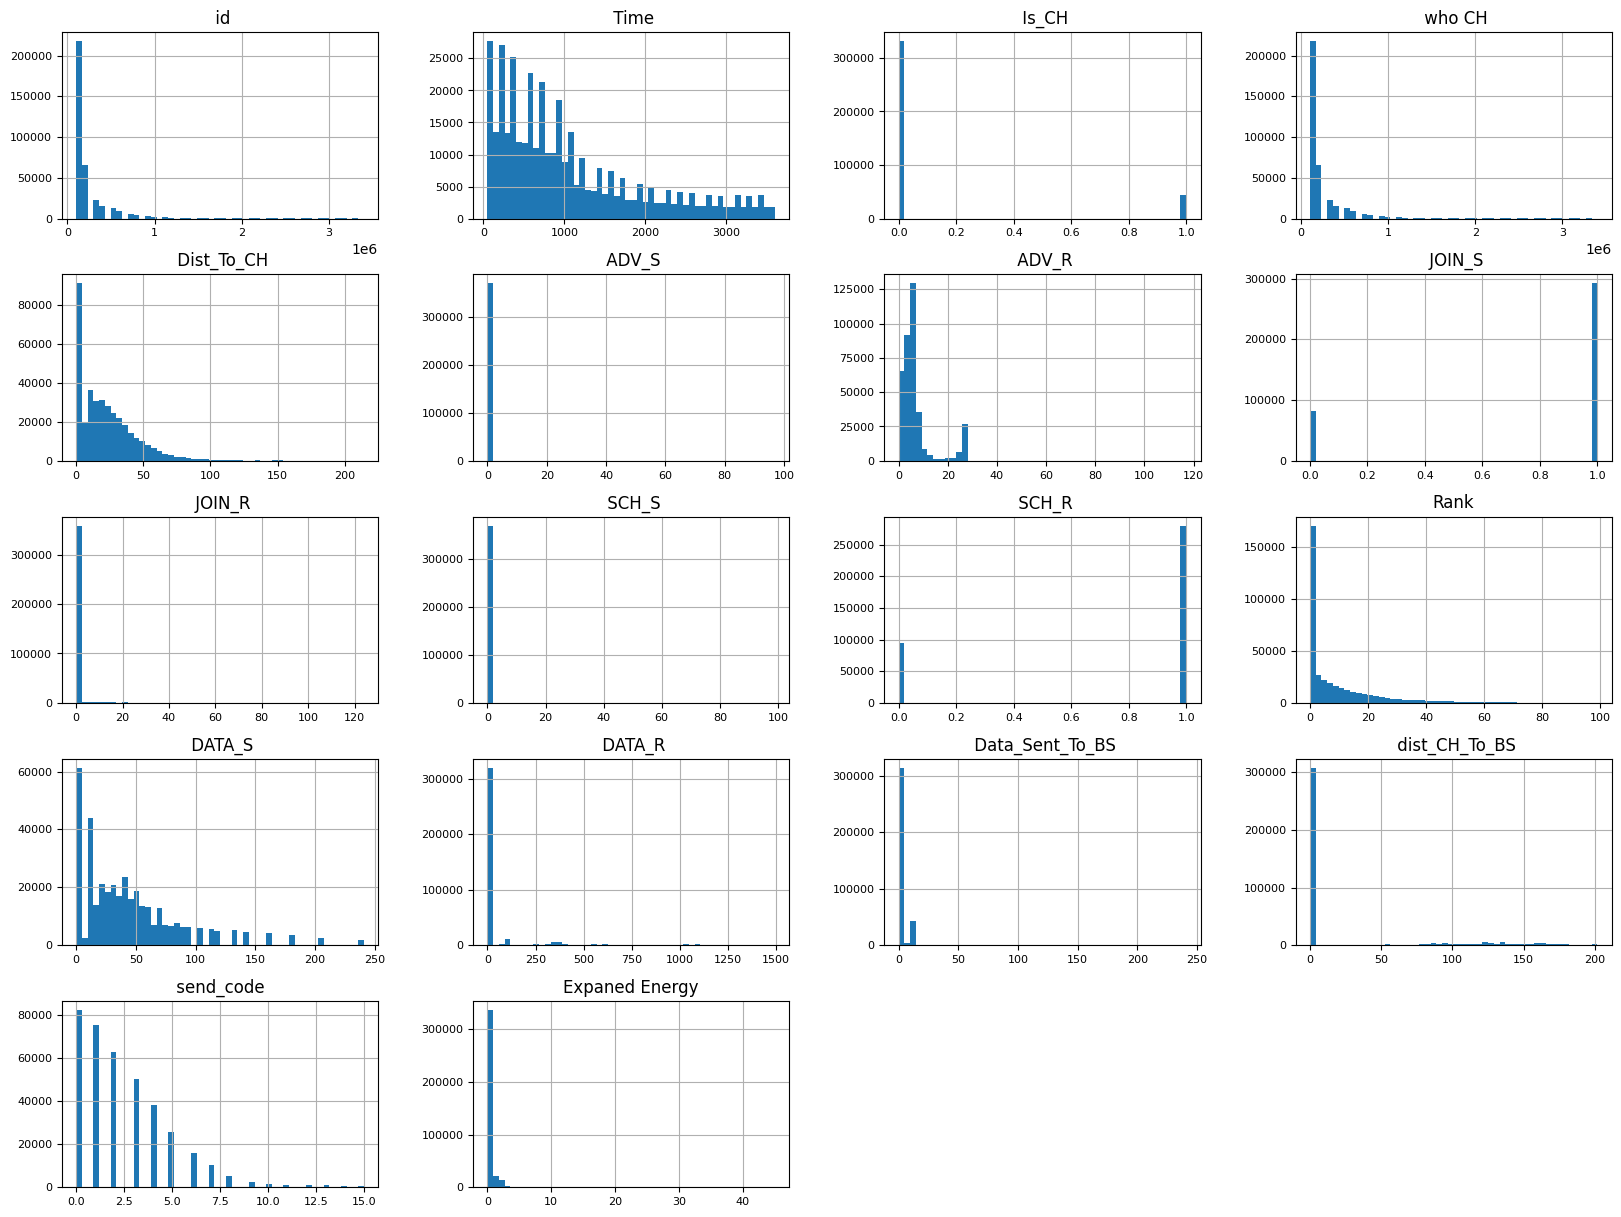

In [94]:
DFOriginal.hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8)

In [95]:
# Display the first few rows of the dataset
DFOriginal.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [96]:
DFOriginalInputs = DFOriginal[InputLabels]
DFOriginalOutput = DFOriginal[OutPutLabel]

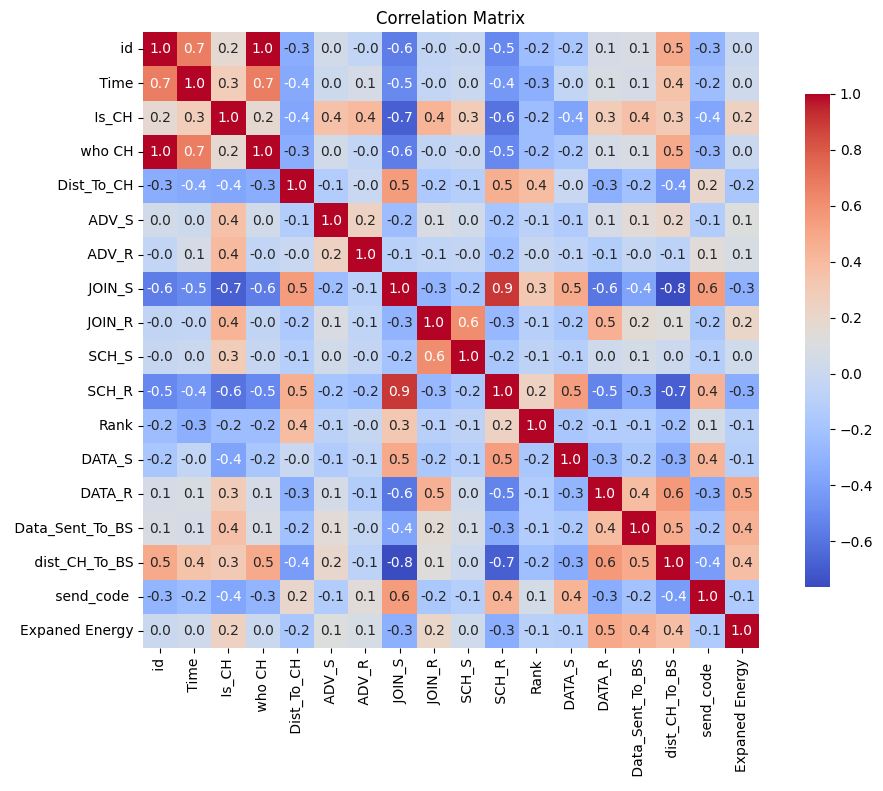

In [97]:
# print th correlation matrix with colored cells
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(DFOriginalInputs.corr(), annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


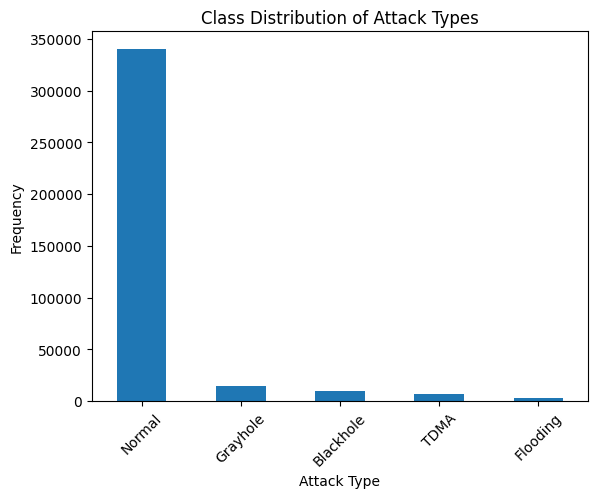

In [98]:
DFOriginalOutput.value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [99]:
import pandas as pd
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

normal_df = DFOriginal[DFOriginal[OutPutLabel] == 'Normal']
normal_downsampled = resample(normal_df,
                              replace=False,
                              n_samples=100000,
                              random_state=42)

minority_df = DFOriginal[DFOriginal[OutPutLabel] != 'Normal']

combined_df = pd.concat([normal_downsampled, minority_df])
X = combined_df.drop(columns=[OutPutLabel]) 
y = combined_df[OutPutLabel]               

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

DFOriginalBalanced = pd.DataFrame(X_resampled, columns=X.columns)
DFOriginalBalanced[OutPutLabel] = y_resampled


In [100]:
DFOriginalInputs = DFOriginalBalanced[InputLabels]
DFOriginalOutput = DFOriginalBalanced[OutPutLabel]

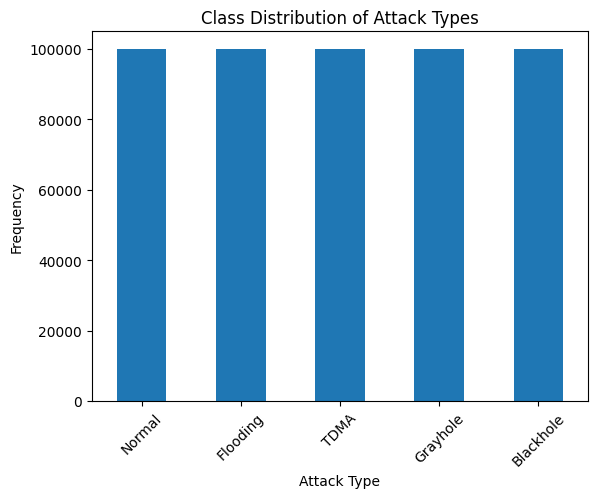

In [101]:
DFOriginalOutput.value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [102]:
def LabelEncoding(DF : pd.DataFrame) -> pd.DataFrame:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    encoded = le.fit_transform(DF)
    return pd.DataFrame(encoded, columns=DF.columns)

In [103]:
DFOriginalInputs.shape, DFOriginalOutput.shape

((500000, 18), (500000,))

In [104]:
DFOriginalOutput = pd.DataFrame(DFOriginalOutput)

DFLEOutput = LabelEncoding(DFOriginalOutput)
DFLEOutput.head()

,Attack type
0,3
1,3
2,3
3,3
4,3


<Axes: xlabel='Attack type'>

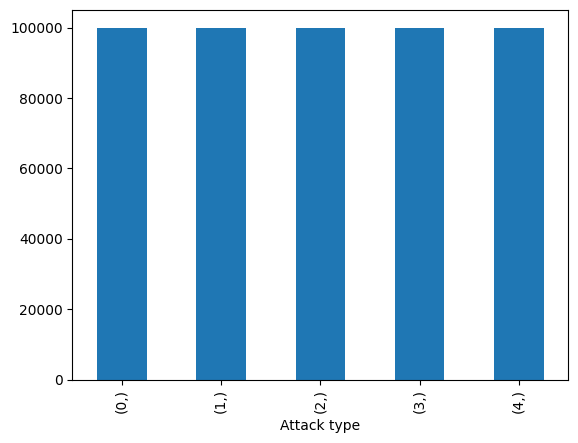

In [105]:
DFLEOutput.value_counts().sort_index().plot(kind='bar')

In [106]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
TrainInput, TestInput, TrainOutput, TestOutput = train_test_split(DFOriginalInputs, DFLEOutput, train_size=0.8, random_state=42, stratify=DFLEOutput)

In [107]:
# TODO: use other scaling methods, like standardscaler, robustscaler

Scaler = sklearn.preprocessing.MinMaxScaler()
DFTrainInputScaled = pd.DataFrame(Scaler.fit_transform(TrainInput), columns=TrainInput.columns)
DFTestInputScaled = pd.DataFrame(Scaler.transform(TestInput), columns=TestInput.columns)

In [108]:
DFTrainInputScaled

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
0,0.183277,0.986761,1.0,0.183303,0.000000,0.010309,0.213675,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.004149,0.680804,0.000000,0.000890
1,0.030320,0.113521,1.0,0.030320,0.000000,0.134021,0.145299,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.053942,0.451392,0.000000,0.023190
2,0.181767,0.831831,1.0,0.181788,0.000000,0.010309,0.213675,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000584
3,0.152398,0.620563,1.0,0.152404,0.000000,0.010309,0.205128,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000099
4,0.003640,0.169859,1.0,0.003640,0.000000,0.010309,0.034188,0.0,0.165217,0.191919,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0.151494,0.690986,1.0,0.151495,0.000000,0.010309,0.222222,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.009473
399996,0.003337,0.155775,0.0,0.003352,0.098106,0.000000,0.076923,1.0,0.000000,0.000000,1.0,0.020202,0.497925,0.0,0.000000,0.000000,0.200000,0.004465
399997,0.182680,0.888169,1.0,0.182679,0.000000,0.010309,0.205128,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.006276
399998,0.033035,0.268451,1.0,0.033035,0.000000,0.061856,0.239316,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.053942,0.781320,0.000000,0.041701


In [109]:
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd

# import matplotlib.pyplot as plt

# # Train a Random Forest Classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(DFTrainInputs, DFTrainOutput)

# # Get feature importances
# feature_importances = pd.Series(rf.feature_importances_, index=DFTrainInputs.columns)

# # Sort features by importance
# sorted_features = feature_importances.sort_values(ascending=False)

# # Plot feature importances
# plt.figure(figsize=(12, 6))
# sorted_features.plot(kind='bar')
# plt.title('Feature Importances')
# plt.xlabel('Features')
# plt.ylabel('Importance Score')
# plt.show()

# top_features = sorted_features.head(12).index.tolist()
# print("Top 12 Features:", top_features)
top_features = [' ADV_S', ' SCH_S', 'Expaned Energy', ' Is_CH', ' Data_Sent_To_BS', ' dist_CH_To_BS', ' ADV_R', ' DATA_R', ' JOIN_R', ' DATA_S', 'Rank', ' Time']

In [110]:
DFTrainInputScaledSelected = DFTrainInputScaled[top_features]
DFTestInputScaledSelected = DFTestInputScaled[top_features]

In [ ]:
import sklearn.metrics
def ComputeMetrics(ytrue, ypredicted, ypredictedProba):
    accuracy = sklearn.metrics.accuracy_score(TestOutput,ypredicted)
    balanced_accuracy = sklearn.metrics.balanced_accuracy_score(TestOutput,ypredicted)
    precision = sklearn.metrics.precision_score(TestOutput,ypredicted,average='weighted')
    recall = sklearn.metrics.recall_score(TestOutput,ypredicted,average='weighted')
    f1 = sklearn.metrics.f1_score(TestOutput,ypredicted,average='weighted')
    roc_auc = sklearn.metrics.roc_auc_score(TestOutput,ypredictedProba, average='weighted', multi_class='ovr')
    matthews_corrcoef = sklearn.metrics.matthews_corrcoef(TestOutput,ypredicted)
    return accuracy, balanced_accuracy, precision, recall, f1, roc_auc, matthews_corrcoef


In [195]:
class_names = DFOriginal[OutPutLabel].unique()
def VisualizeConfusionMatrix(ConfusionMatrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Logistic Regression')
    plt.show()

## 1- Logistic Regression

In [112]:
import sklearn.linear_model
# make a random search for the best hyperparameters of the logistic regression model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'C': uniform(0.1, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': randint(100, 1000)
}

# ModelLR = sklearn.linear_model.LogisticRegression(class_weight='balanced')
# random_search = RandomizedSearchCV(ModelLR, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
# random_search.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())

# best_params = random_search.best_params_
# print("Best Hyperparameters: ", best_params)

# ModelLR = sklearn.linear_model.LogisticRegression(**best_params, class_weight='balanced')
# ModelLR.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())

ModelLR = sklearn.linear_model.LogisticRegression(max_iter=1000,solver='newton-cg',class_weight='balanced')
ModelLR.fit(DFTrainInputScaledSelected, TrainOutput)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='newton-cg')

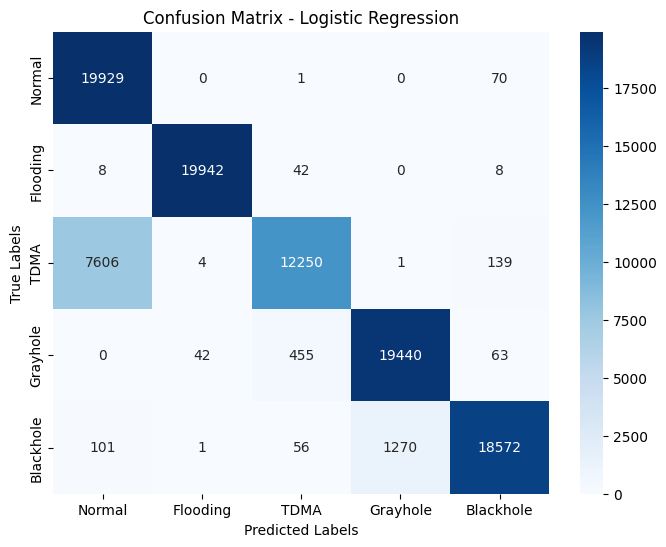

In [198]:
ypred = ModelLR.predict(DFTestInputScaledSelected)
ypredProba = ModelLR.predict_proba(DFTestInputScaledSelected)
ConfusionMatrixLR = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixLR)

In [114]:
LogLossLR = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossLR)

Log Loss:  0.22903385968329007


In [115]:
accuracyLR, balanced_accuracyLR, precisionLR, recallLR, f1LR, roc_aucLR, matthews_corrcoefLR = ComputeMetrics(TestOutput, ypred, ypredProba)

In [116]:
print(f'{'accuracy': <30}', accuracyLR)
print(f'{'balanced_accuracy': <30}', balanced_accuracyLR)
print(f'{'precision': <30}', precisionLR)
print(f'{'recall': <30}', recallLR)
print(f'{'f1': <30}', f1LR)
print(f'{'roc_auc': <30}', roc_aucLR)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefLR)

accuracy                       0.90133
balanced_accuracy              0.90133
precision                      0.9198152037115697
recall                         0.90133
f1                             0.8983753577924204
roc_auc                        0.984366804
matthews_corrcoef              0.8828663869770106


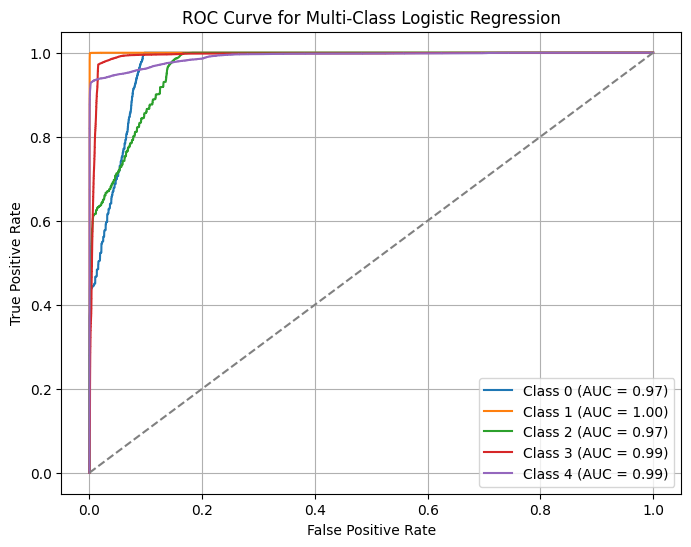

In [117]:
import sklearn.metrics


plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixLR.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## 2- Decision Tree

In [118]:
import sklearn.tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
# ModelDT = sklearn.tree.DecisionTreeClassifier(class_weight='balanced')
# random_search = RandomizedSearchCV(ModelDT, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
# random_search.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
# best_params = random_search.best_params_
# print("Best Hyperparameters: ", best_params)
# ModelDT = sklearn.tree.DecisionTreeClassifier(**best_params, class_weight='balanced')
# ModelDT.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())

ModelDT = sklearn.tree.DecisionTreeClassifier(class_weight='balanced')

In [119]:
ModelDT.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())

DecisionTreeClassifier(class_weight='balanced')

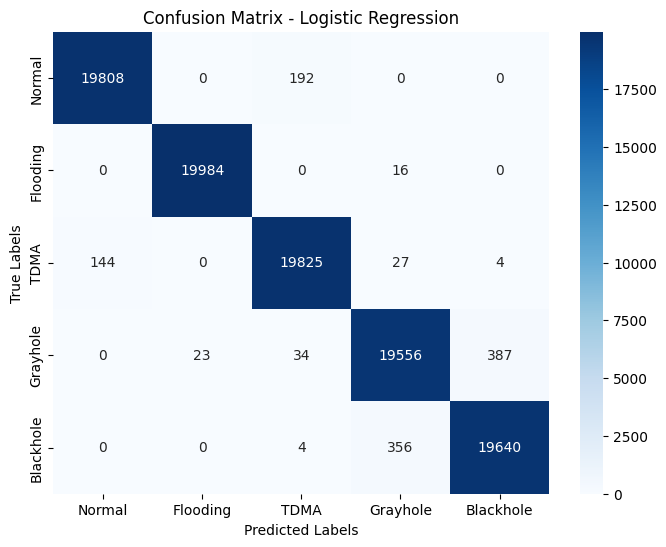

In [199]:
ypred = ModelDT.predict(DFTestInputScaledSelected)
ypredProba = ModelDT.predict_proba(DFTestInputScaledSelected)
ConfusionMatrixDT = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixDT)

In [121]:
accuracyDT, balanced_accuracyDT, precisionDT, recallDT, f1DT, roc_aucDT, matthews_corrcoefDT = ComputeMetrics(TestOutput, ypred, ypredProba)

In [122]:
print(f'{'accuracy': <30}', accuracyDT)
print(f'{'balanced_accuracy': <30}', balanced_accuracyDT)
print(f'{'precision': <30}', precisionDT)
print(f'{'recall': <30}', recallDT)
print(f'{'f1': <30}', f1DT)
print(f'{'roc_auc': <30}', roc_aucDT)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefDT)

accuracy                       0.98813
balanced_accuracy              0.98813
precision                      0.9881299771872688
recall                         0.98813
f1                             0.9881289569044461
roc_auc                        0.9926302331875
matthews_corrcoef              0.9851630149941006


In [123]:
LogLossDT = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossDT)

Log Loss:  0.4251871115289173


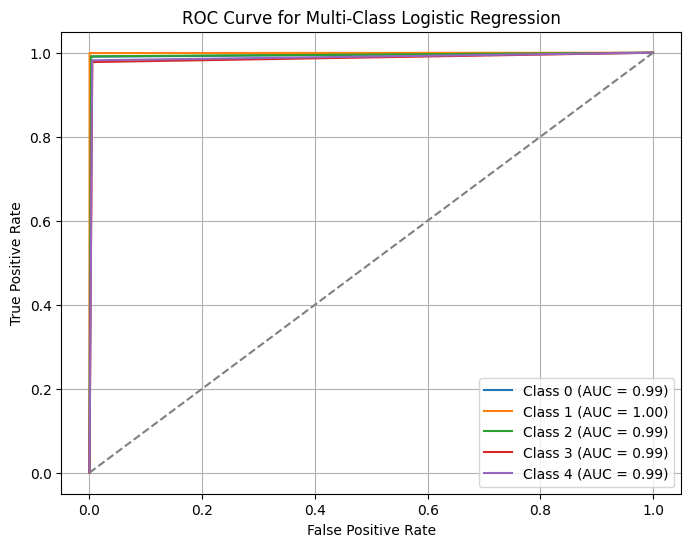

In [124]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixDT.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## 3- Random Forest

In [125]:
# make a random search for the best hyperparameters of the random forest model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
# ModelRF = sklearn.ensemble.RandomForestClassifier(class_weight='balanced')
# random_search = RandomizedSearchCV(ModelRF, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
# random_search.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
# best_params = random_search.best_params_
# print("Best Hyperparameters: ", best_params)
# ModelRF = sklearn.ensemble.RandomForestClassifier(**best_params, class_weight='balanced')
# ModelRF.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())

ModelRF = sklearn.ensemble.RandomForestClassifier(class_weight='balanced')

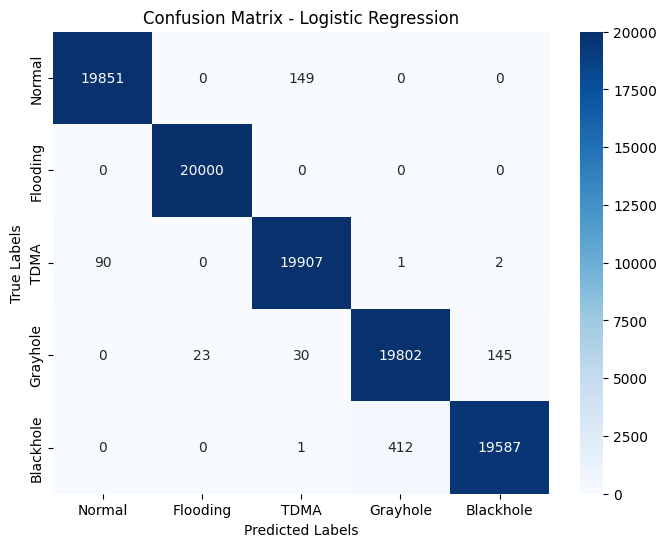

In [200]:
ModelRF.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
ypred = ModelRF.predict(DFTestInputScaledSelected)
ypredProba = ModelRF.predict_proba(DFTestInputScaledSelected)
ConfusionMatrixRF = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixRF)

In [127]:
accuracyRF, balanced_accuracyRF, precisionRF, recallRF, f1RF, roc_aucRF, matthews_corrcoefRF = ComputeMetrics(TestOutput, ypred, ypredProba)

In [128]:
print(f'{'accuracy': <30}', accuracyRF)
print(f'{'balanced_accuracy': <30}', balanced_accuracyRF)
print(f'{'precision': <30}', precisionRF)
print(f'{'recall': <30}', recallRF)
print(f'{'f1': <30}', f1RF)
print(f'{'roc_auc': <30}', roc_aucRF)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefRF)

accuracy                       0.99161
balanced_accuracy              0.99161
precision                      0.9916409483112795
recall                         0.99161
f1                             0.9916091099618585
roc_auc                        0.9994568705625
matthews_corrcoef              0.9895206797828181


In [129]:
LogLossRF = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossRF)

Log Loss:  0.04533592489851535


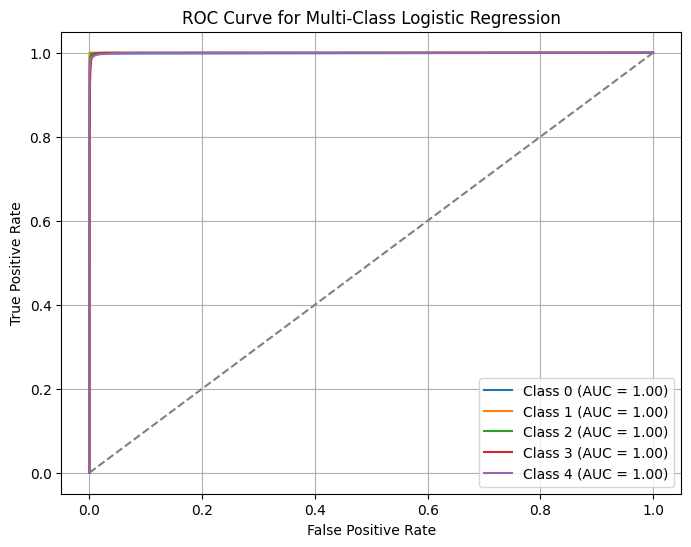

In [130]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixRF.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## 4- SVM

In [131]:
import sklearn.svm
# make a random search for the best hyperparameters of the SVM model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(1, 5),
    'gamma': ['scale', 'auto'],
    'coef0': uniform(0, 1),
    'shrinking': [True, False],
}
# ModelSVM = sklearn.svm.SVC(class_weight='balanced')
# random_search = RandomizedSearchCV(ModelSVM, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
# random_search.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
# best_params = random_search.best_params_
# print("Best Hyperparameters: ", best_params)
# ModelSVM = sklearn.svm.SVC(**best_params, class_weight='balanced')
# ModelSVM.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())

ModelSVM = sklearn.svm.LinearSVC()

In [132]:
ModelSVM.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())

LinearSVC()

In [ ]:
ypred = ModelSVM.predict(DFTestInputScaledSelected)
ypredProba = ModelSVM._predict_proba_lr(DFTestInputScaledSelected)
ConfusionMatrixSVM = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixSVM)

array([[19999,     0,     0,     0,     1],
       [    1, 19994,     5,     0,     0],
       [ 7652,     0, 12266,     0,    82],
       [    0,    24,   473, 19442,    61],
       [   26,     0,    42,  1244, 18688]])

In [134]:
accuracySVM, balanced_accuracySVM, precisionSVM, recallSVM, f1SVM, roc_aucSVM, matthews_corrcoefSVM = ComputeMetrics(TestOutput, ypred, ypredProba)

In [135]:
print(f'{'accuracy': <30}', accuracySVM)
print(f'{'balanced_accuracy': <30}', balanced_accuracySVM)
print(f'{'precision': <30}', precisionSVM)
print(f'{'recall': <30}', recallSVM)
print(f'{'f1': <30}', f1SVM)
print(f'{'roc_auc': <30}', roc_aucSVM)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefSVM)

accuracy                       0.90389
balanced_accuracy              0.90389
precision                      0.9225814360595844
recall                         0.90389
f1                             0.9009261377678107
roc_auc                        0.983722091875
matthews_corrcoef              0.8861335160373822


In [136]:
LogLossSVM = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossSVM)

Log Loss:  0.5541185102333874


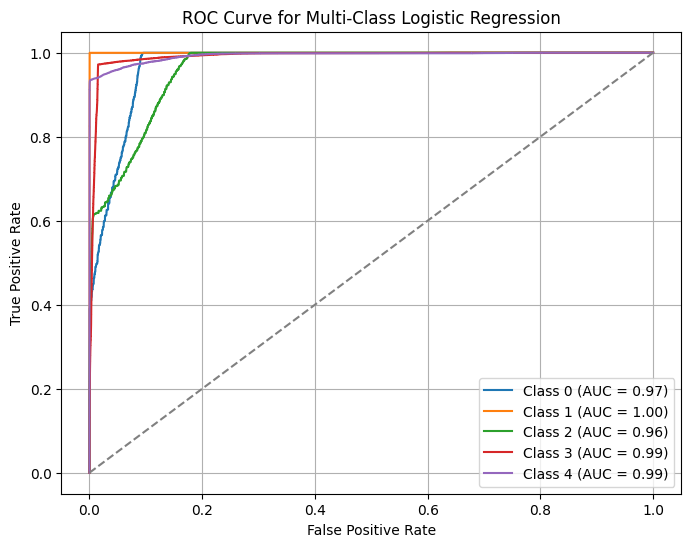

In [137]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixSVM.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## 5- KNN

In [138]:
# knn
import sklearn.neighbors
# make a random search for the best hyperparameters of the knn model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(1, 50),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}
# ModelKNN = sklearn.neighbors.KNeighborsClassifier(class_weight='balanced')
# random_search = RandomizedSearchCV(ModelKNN, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
# random_search.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
# best_params = random_search.best_params_
# print("Best Hyperparameters: ", best_params)
# ModelKNN = sklearn.neighbors.KNeighborsClassifier(**best_params, class_weight='balanced')
# ModelKNN.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
ModelKNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=7)


In [139]:
ModelKNN.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())

KNeighborsClassifier(n_neighbors=7)

In [ ]:
ypred = ModelKNN.predict(DFTestInputScaledSelected)
ypredProba = ModelKNN.predict_proba(DFTestInputScaledSelected)
ConfusionMatrixKNN = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixKNN)


array([[19819,     0,   176,     0,     5],
       [    0, 19990,     6,     2,     2],
       [  137,     3, 19839,     4,    17],
       [    1,    46,    71, 19500,   382],
       [    4,     0,    26,   620, 19350]])

In [141]:
accuracyKNN, balanced_accuracyKNN, precisionKNN, recallKNN, f1KNN, roc_aucKNN, matthews_corrcoefKNN = ComputeMetrics(TestOutput, ypred, ypredProba)

In [142]:
print(f'{'accuracy': <30}', accuracyKNN)
print(f'{'balanced_accuracy': <30}', balanced_accuracyKNN)
print(f'{'precision': <30}', precisionKNN)
print(f'{'recall': <30}', recallKNN)
print(f'{'f1': <30}', f1KNN)
print(f'{'roc_auc': <30}', roc_aucKNN)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefKNN)

accuracy                       0.98498
balanced_accuracy              0.98498
precision                      0.9849835910223462
recall                         0.98498
f1                             0.9849704552310221
roc_auc                        0.9979446390625001
matthews_corrcoef              0.9812306652742544


In [143]:
LogLossKNN = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossKNN)

Log Loss:  0.13055662225628478


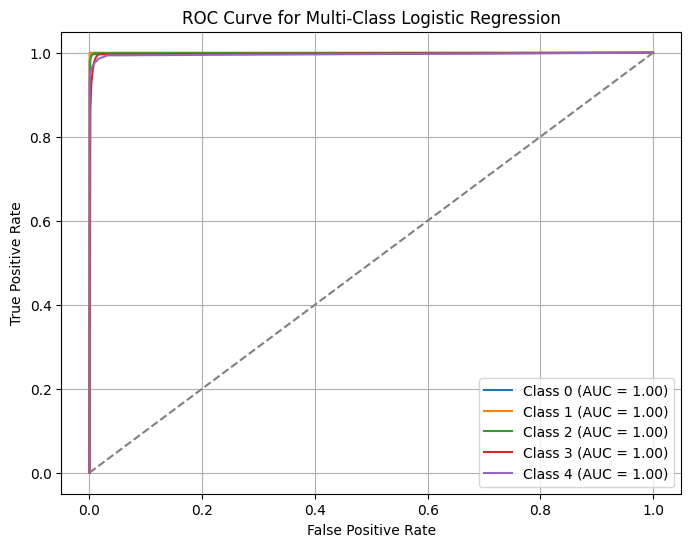

In [144]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixKNN.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## 6- XGBClassifier

In [145]:
# XGBClassifier

import xgboost as xgb
# make a random search for the best hyperparameters of the xgboost model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 5),
}
# ModelXGB = xgb.XGBClassifier(class_weight='balanced')
# random_search = RandomizedSearchCV(ModelXGB, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
# random_search.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
# best_params = random_search.best_params_
# print("Best Hyperparameters: ", best_params)
# ModelXGB = xgb.XGBClassifier(**best_params, class_weight='balanced')
# ModelXGB.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
ModelXGB = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', class_weight='balanced')


In [146]:
ModelXGB.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

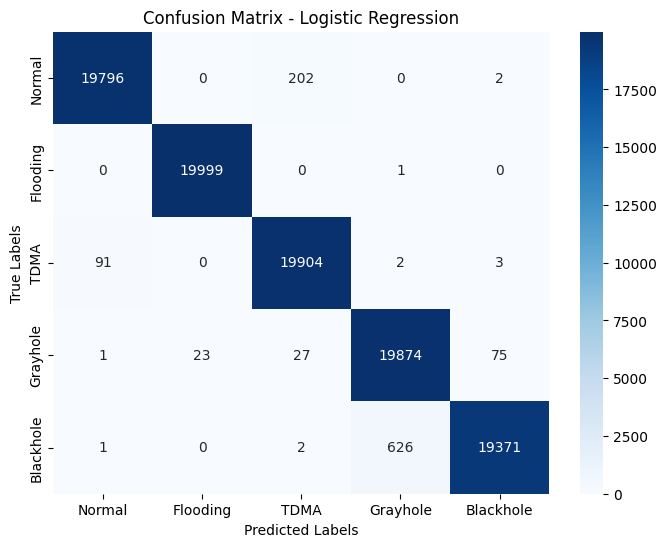

In [201]:
ypred = ModelXGB.predict(DFTestInputScaledSelected)
ypredProba = ModelXGB.predict_proba(DFTestInputScaledSelected)
ConfusionMatrixXGB = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixXGB)


In [148]:
accuracyXGB, balanced_accuracyXGB, precisionXGB, recallXGB, f1XGB, roc_aucXGB, matthews_corrcoefXGB = ComputeMetrics(TestOutput, ypred, ypredProba)

In [149]:
print(f'{'accuracy': <30}', accuracyXGB)
print(f'{'balanced_accuracy': <30}', balanced_accuracyXGB)
print(f'{'precision': <30}', precisionXGB)
print(f'{'recall': <30}', recallXGB)
print(f'{'f1': <30}', f1XGB)
print(f'{'roc_auc': <30}', roc_aucXGB)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefXGB)

accuracy                       0.98944
balanced_accuracy              0.9894400000000001
precision                      0.9895822830957819
recall                         0.98944
f1                             0.9894389820710929
roc_auc                        0.9997349143125001
matthews_corrcoef              0.9868361089938543


In [150]:
LogLossXGB = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossXGB)

Log Loss:  0.03223446941554445


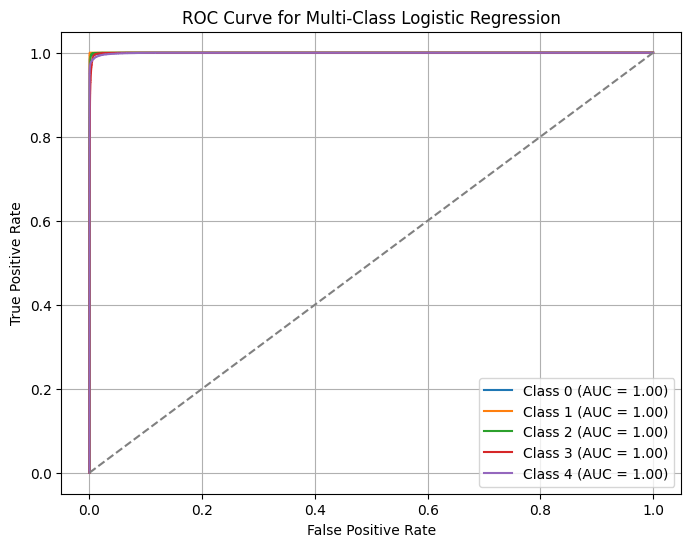

In [151]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixXGB.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## 7- LGBMClassifier

In [152]:
# LGBMClassifier
import lightgbm as lgb
# make a random search for the best hyperparameters of the lightgbm model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}
# ModelLGBM = lgb.LGBMClassifier(class_weight='balanced')
# random_search = RandomizedSearchCV(ModelLGBM, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
# random_search.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
# best_params = random_search.best_params_
# print("Best Hyperparameters: ", best_params)
# ModelLGBM = lgb.LGBMClassifier(**best_params, class_weight='balanced')
# ModelLGBM.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
ModelLGBM = lgb.LGBMClassifier()


In [153]:
ModelLGBM.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 12
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


LGBMClassifier()

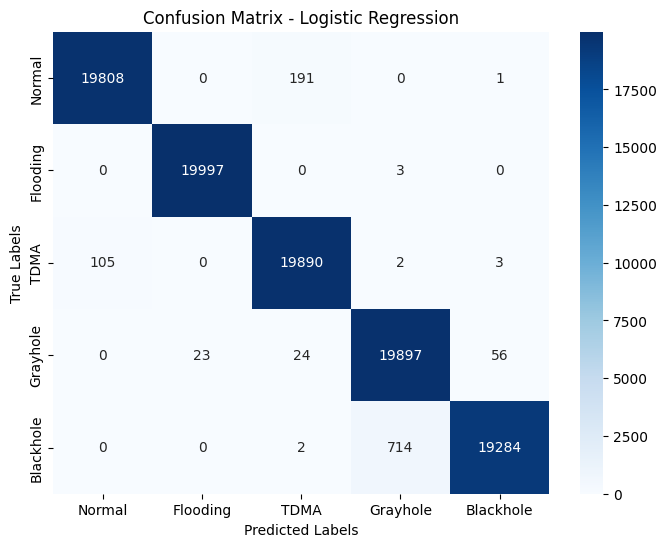

In [202]:
ypred = ModelLGBM.predict(DFTestInputScaledSelected)
ypredProba = ModelLGBM.predict_proba(DFTestInputScaledSelected)
ConfusionMatrixLGBM = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixLGBM)

In [155]:
accuracyLGBM, balanced_accuracyLGBM, precisionLGBM, recallLGBM, f1LGBM, roc_aucLGBM, matthews_corrcoefLGBM = ComputeMetrics(TestOutput, ypred, ypredProba)

In [156]:
print(f'{'accuracy': <30}', accuracyLGBM)
print(f'{'balanced_accuracy': <30}', balanced_accuracyLGBM)
print(f'{'precision': <30}', precisionLGBM)
print(f'{'recall': <30}', recallLGBM)
print(f'{'f1': <30}', f1LGBM)
print(f'{'roc_auc': <30}', roc_aucLGBM)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefLGBM)


accuracy                       0.98876
balanced_accuracy              0.9887599999999999
precision                      0.9889616777195072
recall                         0.98876
f1                             0.988758831099916
roc_auc                        0.9997072232499999
matthews_corrcoef              0.9860011014475498


In [157]:
LogLossLGBM = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossLGBM)

Log Loss:  0.03395854427827664


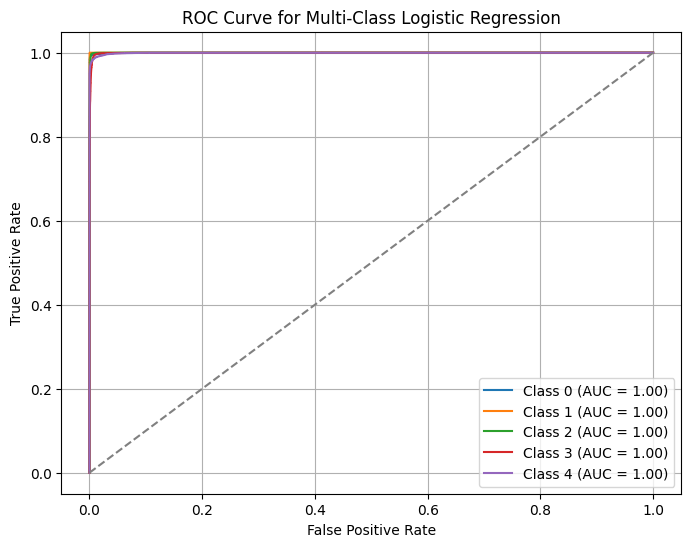

In [158]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixLGBM.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## 8- ExtraTreesClassifier

In [159]:
# ExtraTreesClassifier
import sklearn.ensemble
# make a random search for the best hyperparameters of the ExtraTreesClassifier model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2'],
}
# ModelETC = sklearn.ensemble.ExtraTreesClassifier(class_weight='balanced')
# random_search = RandomizedSearchCV(ModelETC, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
# random_search.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
# best_params = random_search.best_params_
# print("Best Hyperparameters: ", best_params)
# ModelETC = sklearn.ensemble.ExtraTreesClassifier(**best_params, class_weight='balanced')
# ModelETC.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
ModelETC = sklearn.ensemble.ExtraTreesClassifier(class_weight='balanced')

In [160]:
ModelETC.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())


ExtraTreesClassifier(class_weight='balanced')

In [ ]:
ypred = ModelETC.predict(DFTestInputScaledSelected)
ypredProba = ModelETC.predict_proba(DFTestInputScaledSelected)
ConfusionMatrixETC = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixETC)


array([[19857,     0,   143,     0,     0],
       [    0, 19999,     0,     1,     0],
       [  110,     0, 19889,     0,     1],
       [    0,    24,    25, 19790,   161],
       [    1,     0,     0,   403, 19596]])

In [162]:
accuracyETC, balanced_accuracyETC, precisionETC, recallETC, f1ETC, roc_aucETC, matthews_corrcoefETC = ComputeMetrics(TestOutput, ypred, ypredProba)

In [163]:
print(f'{'accuracy': <30}', accuracyETC)
print(f'{'balanced_accuracy': <30}', balanced_accuracyETC)
print(f'{'precision': <30}', precisionETC)
print(f'{'recall': <30}', recallETC)
print(f'{'f1': <30}', f1ETC)
print(f'{'roc_auc': <30}', roc_aucETC)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefETC)



accuracy                       0.99131
balanced_accuracy              0.99131
precision                      0.9913322406686872
recall                         0.99131
f1                             0.9913086319854474
roc_auc                        0.9991529857499999
matthews_corrcoef              0.9891437441132361


In [164]:
LogLossETC = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossETC)


Log Loss:  0.06160359677918145


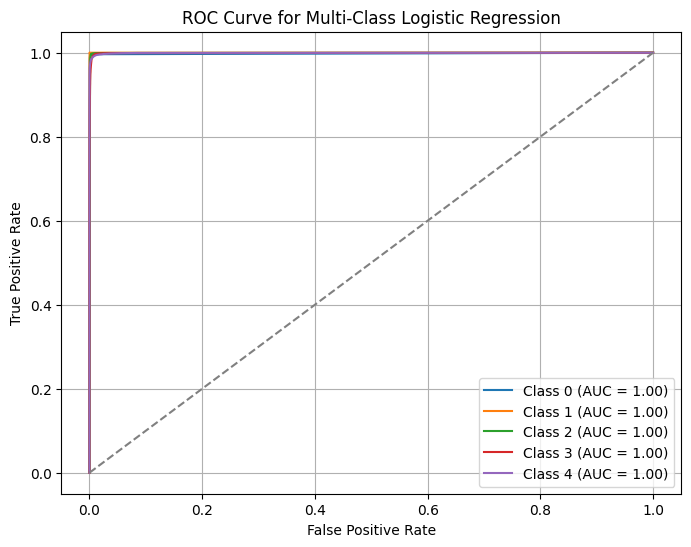

In [165]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixETC.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## 9- BaggingClassifier

In [166]:
# BaggingClassifier
import sklearn.ensemble
# make a random search for the best hyperparameters of the BaggingClassifier model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
param_distributions = {
    'n_estimators': randint(10, 200),
    'max_samples': uniform(0.1, 1.0),
    'max_features': uniform(0.1, 1.0),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
}
# ModelBC = sklearn.ensemble.BaggingClassifier(class_weight='balanced')
# random_search = RandomizedSearchCV(ModelBC, param_distributions, n_iter=10, cv=3, scoring='f1_weighted', random_state=42, n_jobs=-1)
# random_search.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
# best_params = random_search.best_params_
# print("Best Hyperparameters: ", best_params)
# ModelBC = sklearn.ensemble.BaggingClassifier(**best_params, class_weight='balanced')
# ModelBC.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())
ModelBC = sklearn.ensemble.BaggingClassifier()


In [167]:
ModelBC.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())


BaggingClassifier()

In [ ]:
ypred = ModelBC.predict(DFTestInputScaledSelected)
ypredProba = ModelBC.predict_proba(DFTestInputScaledSelected)
ConfusionMatrixBC = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixBC)


array([[19835,     0,   165,     0,     0],
       [    0, 20000,     0,     0,     0],
       [  117,     0, 19872,     7,     4],
       [    0,    25,    43, 19745,   187],
       [    0,     0,     4,   427, 19569]])

In [170]:
accuracyBC, balanced_accuracyBC, precisionBC, recallBC, f1BC, roc_aucBC, matthews_corrcoefBC = ComputeMetrics(TestOutput, ypred, ypredProba)

In [171]:
print(f'{'accuracy': <30}', accuracyBC)
print(f'{'balanced_accuracy': <30}', balanced_accuracyBC)
print(f'{'precision': <30}', precisionBC)
print(f'{'recall': <30}', recallBC)
print(f'{'f1': <30}', f1BC)
print(f'{'roc_auc': <30}', roc_aucBC)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefBC)


accuracy                       0.99021
balanced_accuracy              0.99021
precision                      0.9902316641724638
recall                         0.99021
f1                             0.9902085216203279
roc_auc                        0.9982507449375
matthews_corrcoef              0.9877686504841218


In [172]:
LogLossBC = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossBC)


Log Loss:  0.11177196612003402


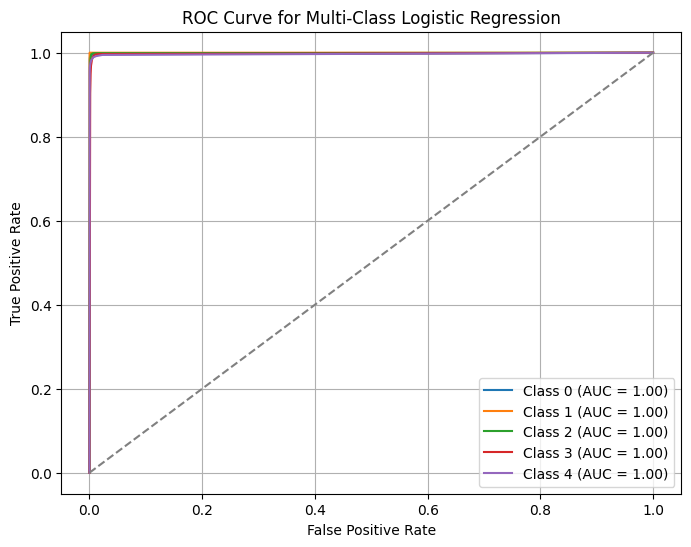

In [173]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixBC.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## 10- VotingClassifier

In [ ]:
# VotingClassifier
import sklearn.ensemble
# make a random search for the best hyperparameters of the VotingClassifier model
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import lightgbm as lgb
import sklearn.linear_model
import sklearn.ensemble
import sklearn.tree
import sklearn.svm
import sklearn.neighbors
from scipy.stats import uniform, randint

ModelVC = sklearn.ensemble.VotingClassifier(estimators=[('lr', sklearn.linear_model.LogisticRegression()),
                   ('rf', sklearn.ensemble.RandomForestClassifier()),
                   ('dt', sklearn.tree.DecisionTreeClassifier()),
                   ('svc', sklearn.svm.SVC(probability=True)),
                   ('knn', sklearn.neighbors.KNeighborsClassifier()),
                   ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
                   ('lgbm', lgb.LGBMClassifier()),
                   ('etc', sklearn.ensemble.ExtraTreesClassifier()),
                   ('bc', sklearn.ensemble.BaggingClassifier())], voting='soft')


In [ ]:
ModelVC.fit(DFTrainInputScaledSelected, TrainOutput.values.ravel())


In [ ]:
ypred = ModelVC.predict(DFTestInputScaledSelected)
ypredProba = ModelVC.predict_proba(DFTestInputScaledSelected)
ConfusionMatrixVC = sklearn.metrics.confusion_matrix(TestOutput, ypred)
VisualizeConfusionMatrix(ConfusionMatrixVC)


In [ ]:
accuracyVC, balanced_accuracyVC, precisionVC, recallVC, f1VC, roc_aucVC, matthews_corrcoefVC = ComputeMetrics(TestOutput, ypred, ypredProba)

In [ ]:
print(f'{'accuracy': <30}', accuracyVC)
print(f'{'balanced_accuracy': <30}', balanced_accuracyVC)
print(f'{'precision': <30}', precisionVC)
print(f'{'recall': <30}', recallVC)
print(f'{'f1': <30}', f1VC)
print(f'{'roc_auc': <30}', roc_aucVC)
print(f'{'matthews_corrcoef': <30}', matthews_corrcoefVC)


In [ ]:
LogLossVC = sklearn.metrics.log_loss(TestOutput, ypredProba)
print("Log Loss: ", LogLossVC)


In [ ]:
import sklearn.metrics

plt.figure(figsize=(8, 6))
for i in range(ConfusionMatrixVC.shape[0]):
    fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
    auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
    plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Logistic Regression")
plt.legend()
plt.grid()
plt.show()

## 11- Neural Networks

## Visualizations and Comparisons

In [174]:
ModelNames = [
    "Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN",
    "XGBoost", "LightGBM", "Extra Trees", "Bagging"
]
MetricNames = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log Loss', 'Matthews Correlation Coefficient']


In [175]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from builtins import min, max

def PlotArrayVSModelNames(array, PlotName : str):
    sorted_indices = numpy.argsort(array)
    sorted_array = numpy.array(array)[sorted_indices]
    sorted_names = numpy.array(ModelNames)[sorted_indices]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=sorted_array, y=sorted_names, palette="Blues_d", orient='h')

    for i, (loss, name) in enumerate(zip(sorted_array, sorted_names)):
        plt.text(loss + 0.001, i, f"{loss:.4f}", va='center', fontsize=9)

    min_loss = min(sorted_array)
    max_loss = max(sorted_array)
    plt.xlim(min_loss - 0.01, max_loss + 0.01)

    plt.xlabel(PlotName)
    plt.title(f"Model {PlotName} Comparison")
    plt.tight_layout()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


In [176]:

ModelsMetrics = {
    'Logistic Regression': {
        'Accuracy': accuracyLR,
        'Balanced Accuracy': balanced_accuracyLR,
        'Precision': precisionLR,
        'Recall': recallLR,
        'F1-Score': f1LR,
        'ROC AUC': roc_aucLR,
        'Log Loss': LogLossLR,
        'Matthews Correlation Coefficient': matthews_corrcoefLR,
    },
    'Decision Tree': {
        'Accuracy': accuracyDT,
        'Balanced Accuracy': balanced_accuracyDT,
        'Precision': precisionDT,
        'Recall': recallDT,
        'F1-Score': f1DT,
        'ROC AUC': roc_aucDT,
        'Log Loss': LogLossDT,
        'Matthews Correlation Coefficient': matthews_corrcoefDT,
    },
    'Random Forest': {
        'Accuracy': accuracyRF,
        'Balanced Accuracy': balanced_accuracyRF,
        'Precision': precisionRF,
        'Recall': recallRF,
        'F1-Score': f1RF,
        'ROC AUC': roc_aucRF,
        'Log Loss': LogLossRF,
        'Matthews Correlation Coefficient': matthews_corrcoefRF,
    },
    'SVM': {
        'Accuracy': accuracySVM,
        'Balanced Accuracy': balanced_accuracySVM,
        'Precision': precisionSVM,
        'Recall': recallSVM,
        'F1-Score': f1SVM,
        'ROC AUC': roc_aucSVM,
        'Log Loss': LogLossSVM,
        'Matthews Correlation Coefficient': matthews_corrcoefSVM,
    },
    'KNN': {
        'Accuracy': accuracyKNN,
        'Balanced Accuracy': balanced_accuracyKNN,
        'Precision': precisionKNN,
        'Recall': recallKNN,
        'F1-Score': f1KNN,
        'ROC AUC': roc_aucKNN,
        'Log Loss': LogLossKNN,
        'Matthews Correlation Coefficient': matthews_corrcoefKNN,
    },
    'XGBoost': {
        'Accuracy': accuracyXGB,
        'Balanced Accuracy': balanced_accuracyXGB,
        'Precision': precisionXGB,
        'Recall': recallXGB,
        'F1-Score': f1XGB,
        'ROC AUC': roc_aucXGB,
        'Log Loss': LogLossXGB,
        'Matthews Correlation Coefficient': matthews_corrcoefXGB,
    },
    'LightGBM': {
        'Accuracy': accuracyLGBM,
        'Balanced Accuracy': balanced_accuracyLGBM,
        'Precision': precisionLGBM,
        'Recall': recallLGBM,
        'F1-Score': f1LGBM,
        'ROC AUC': roc_aucLGBM,
        'Log Loss': LogLossLGBM,
        'Matthews Correlation Coefficient': matthews_corrcoefLGBM,
    },
    'Extra Trees': {
        'Accuracy': accuracyETC,
        'Balanced Accuracy': balanced_accuracyETC,
        'Precision': precisionETC,
        'Recall': recallETC,
        'F1-Score': f1ETC,
        'ROC AUC': roc_aucETC,
        'Log Loss': LogLossETC,
        'Matthews Correlation Coefficient': matthews_corrcoefETC,
    },
    'Bagging': {
        'Accuracy': accuracyBC,
        'Balanced Accuracy': balanced_accuracyBC,
        'Precision': precisionBC,
        'Recall': recallBC,
        'F1-Score': f1BC,
        'ROC AUC': roc_aucBC,
        'Log Loss': LogLossBC,
        'Matthews Correlation Coefficient': matthews_corrcoefBC,
    },
}

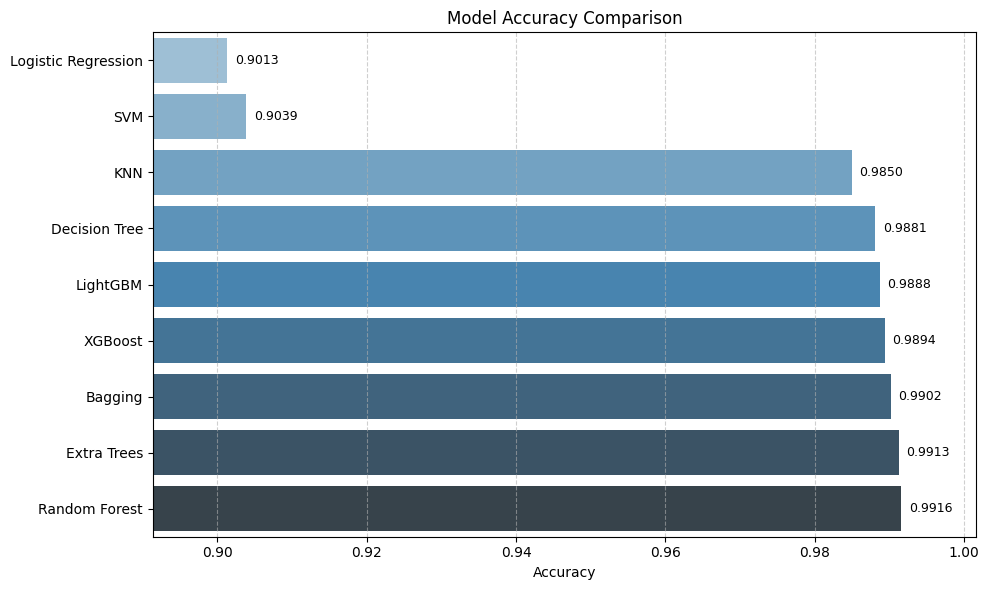

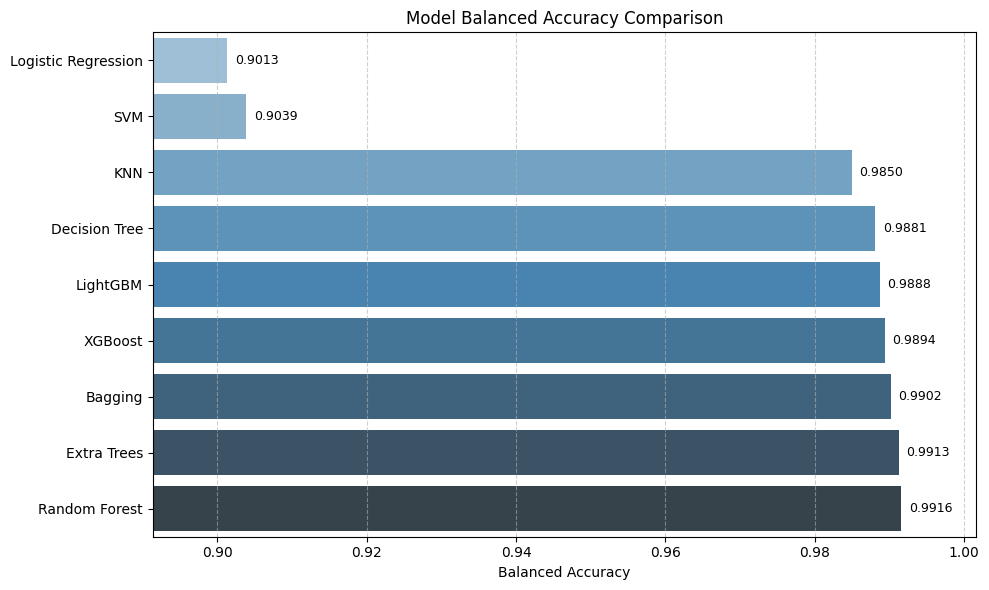

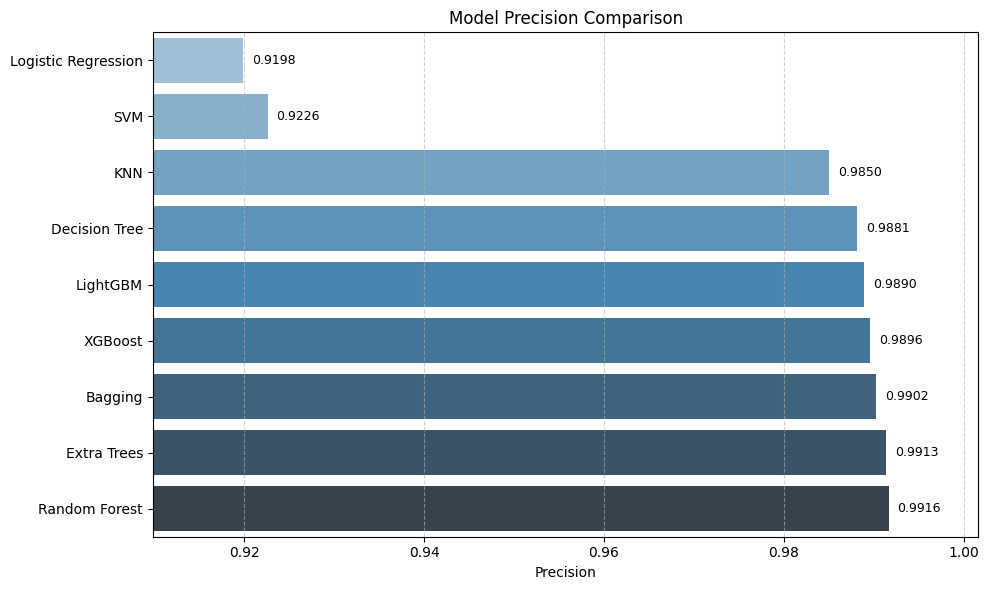

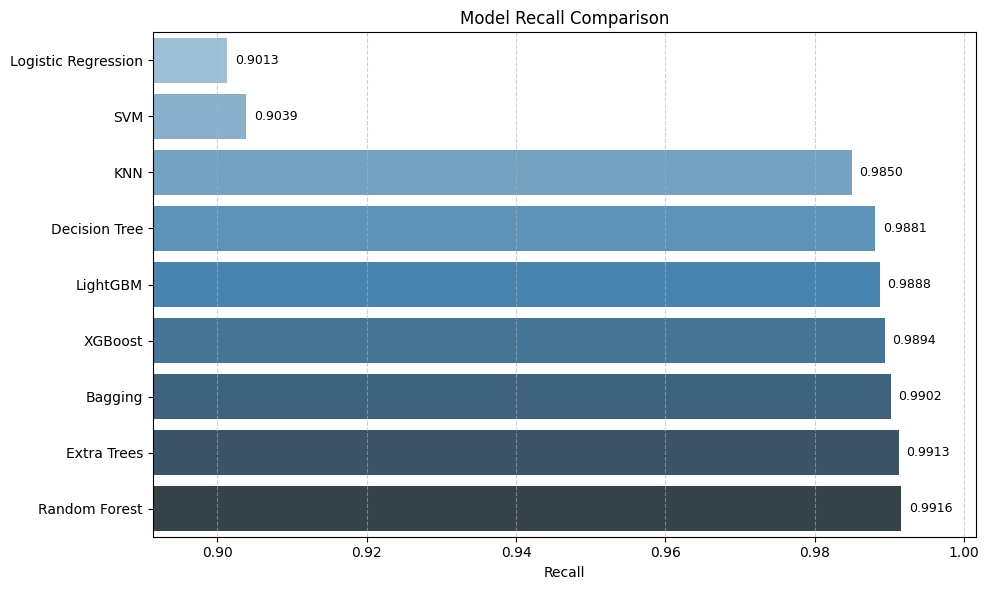

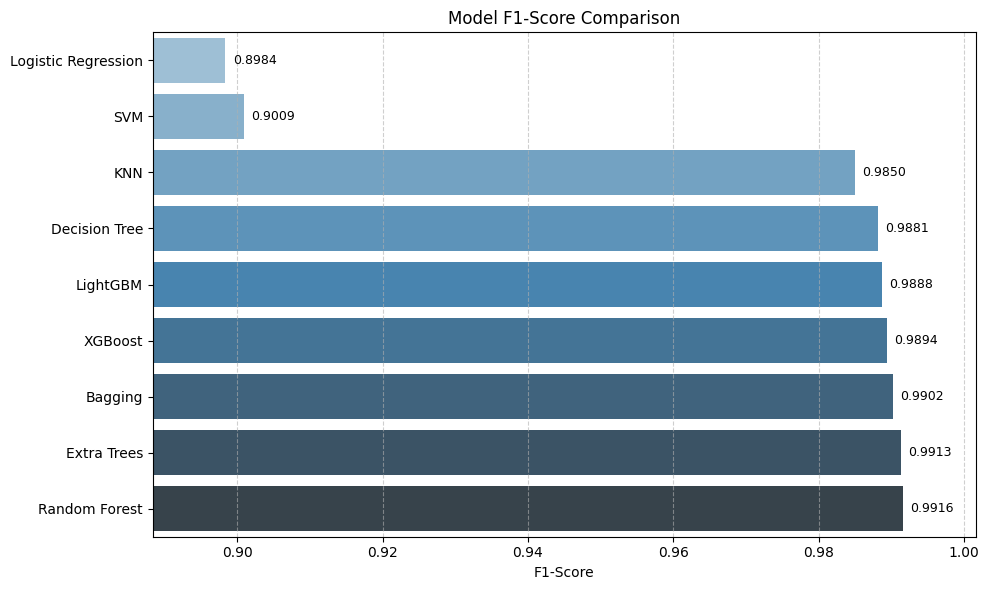

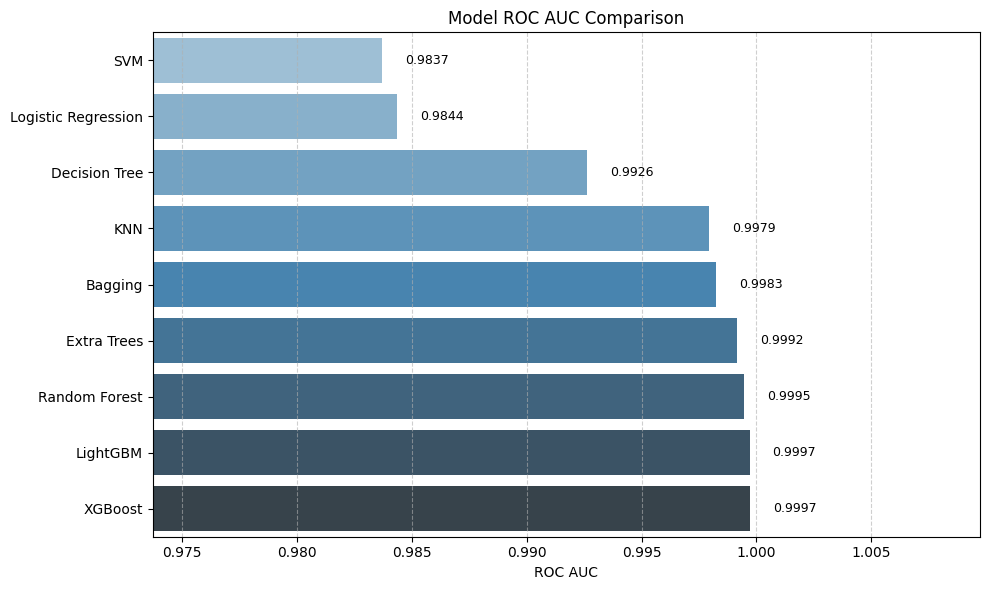

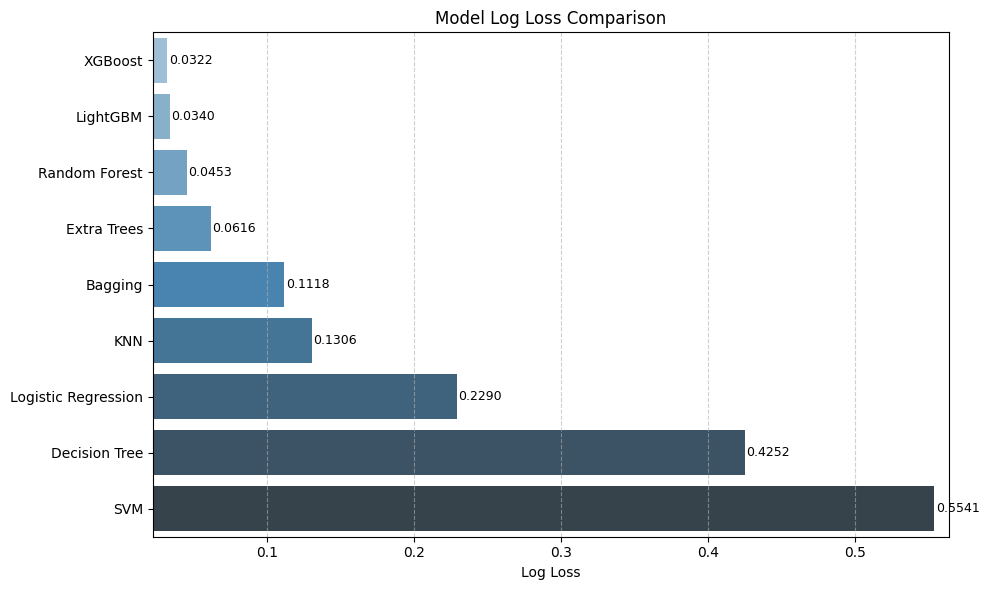

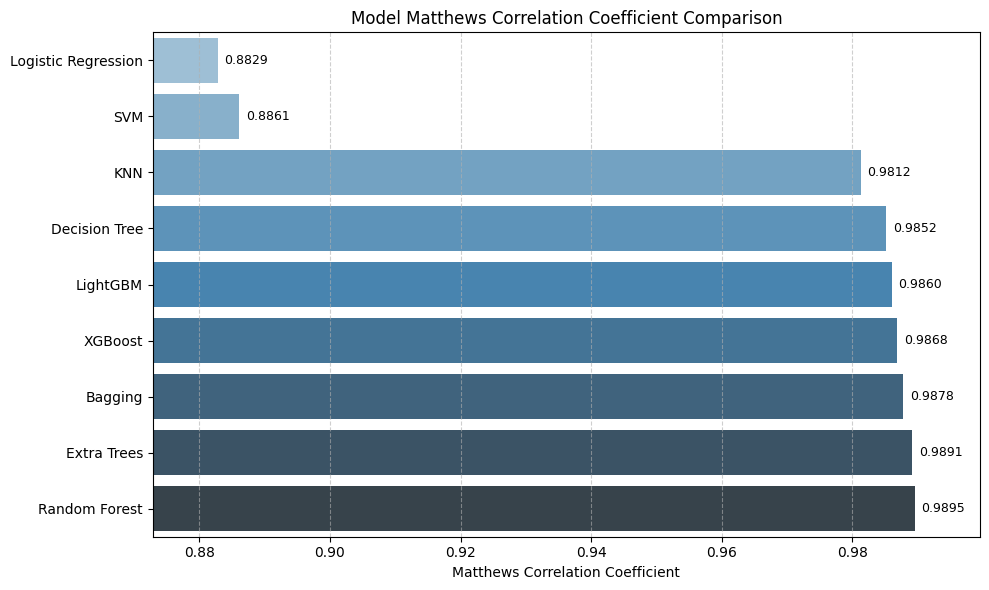

In [177]:
def GetMetric(metric : str) -> list:
    return [metrics[metric] for _ , metrics in ModelsMetrics.items()]

for metric in MetricNames:
    PlotArrayVSModelNames(GetMetric(metric), metric)

In [178]:
MinMaxMetricsIndex : dict[str, tuple] = {
}
for metric in MetricNames:
    min, max = numpy.argmin(GetMetric(metric)), numpy.argmax(GetMetric(metric))
    MinMaxMetricsIndex[metric] = (min, max)



In [179]:
# Print the model names corresponding to the indices
print(f'{"Minimum loss: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Log Loss'][0]]}, with a value of : ': <35}", GetMetric('Log Loss')[MinMaxMetricsIndex['Log Loss'][0]])
print(f'{"Maximum accuracy: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Accuracy'][1]]}, with a value of : ': <35}", GetMetric('Accuracy')[MinMaxMetricsIndex['Accuracy'][1]])
print(f'{"Maximum balanced accuracy: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Balanced Accuracy'][1]]}, with a value of : ': <35}", GetMetric('Balanced Accuracy')[MinMaxMetricsIndex['Balanced Accuracy'][1]])
print(f'{"Maximum precision: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Precision'][1]]}, with a value of : ': <35}", GetMetric('Precision')[MinMaxMetricsIndex['Precision'][1]])
print(f'{"Maximum recall: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Recall'][1]]}, with a value of : ': <35}", GetMetric('Recall')[MinMaxMetricsIndex['Recall'][1]])
print(f'{"Maximum F1 score: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['F1-Score'][1]]}, with a value of : ': <35}", GetMetric('F1-Score')[MinMaxMetricsIndex['F1-Score'][1]])
print(f'{"Maximum ROC AUC: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['ROC AUC'][1]]}, with a value of : ': <35}", GetMetric('ROC AUC')[MinMaxMetricsIndex['ROC AUC'][1]])
print(f'{"Maximum Matthews correlation coefficient: ": <45}', f"{f'{ModelNames[MinMaxMetricsIndex['Matthews Correlation Coefficient'][1]]}, with a value of : ': <35}", GetMetric('Matthews Correlation Coefficient')[MinMaxMetricsIndex['Matthews Correlation Coefficient'][1]])


Minimum loss:                                 XGBoost, with a value of :          0.03223446941554445
Maximum accuracy:                             Random Forest, with a value of :    0.99161
Maximum balanced accuracy:                    Random Forest, with a value of :    0.99161
Maximum precision:                            Random Forest, with a value of :    0.9916409483112795
Maximum recall:                               Random Forest, with a value of :    0.99161
Maximum F1 score:                             Random Forest, with a value of :    0.9916091099618585
Maximum ROC AUC:                              XGBoost, with a value of :          0.9997349143125001
Maximum Matthews correlation coefficient:     Random Forest, with a value of :    0.9895206797828181


In [180]:
CurrentModels = {
    "LogisticRegression": ModelLR,
    "DecisionTree": ModelDT,
    "RandomForest": ModelRF,
    "SVM": ModelSVM,
    "KNN": ModelKNN,
    "XGBoost": ModelXGB,
    "LightGBM": ModelLGBM,
    "ExtraTrees": ModelETC,
    "Bagging": ModelBC,
}
CurrentMetrics = ModelsMetrics

In [181]:
import joblib
import os

def SaveInfo(models, metrics, FilePath):
    os.makedirs(FilePath, exist_ok=True)
    joblib.dump(models, f'{FilePath}/Models.pkl')
    joblib.dump(metrics, f'{FilePath}/Metrics.pkl')
def LoadInfo(FilePath):
    mo = joblib.load(f'{FilePath}/Models.pkl')
    me = joblib.load(f'{FilePath}/Metrics.pkl')
    return mo, me

In [189]:
modelunbal, metricsunbal = LoadInfo('MMFolder/UnBalanced')
modelbal, metricsbal = LoadInfo('MMFolder/Balanced')

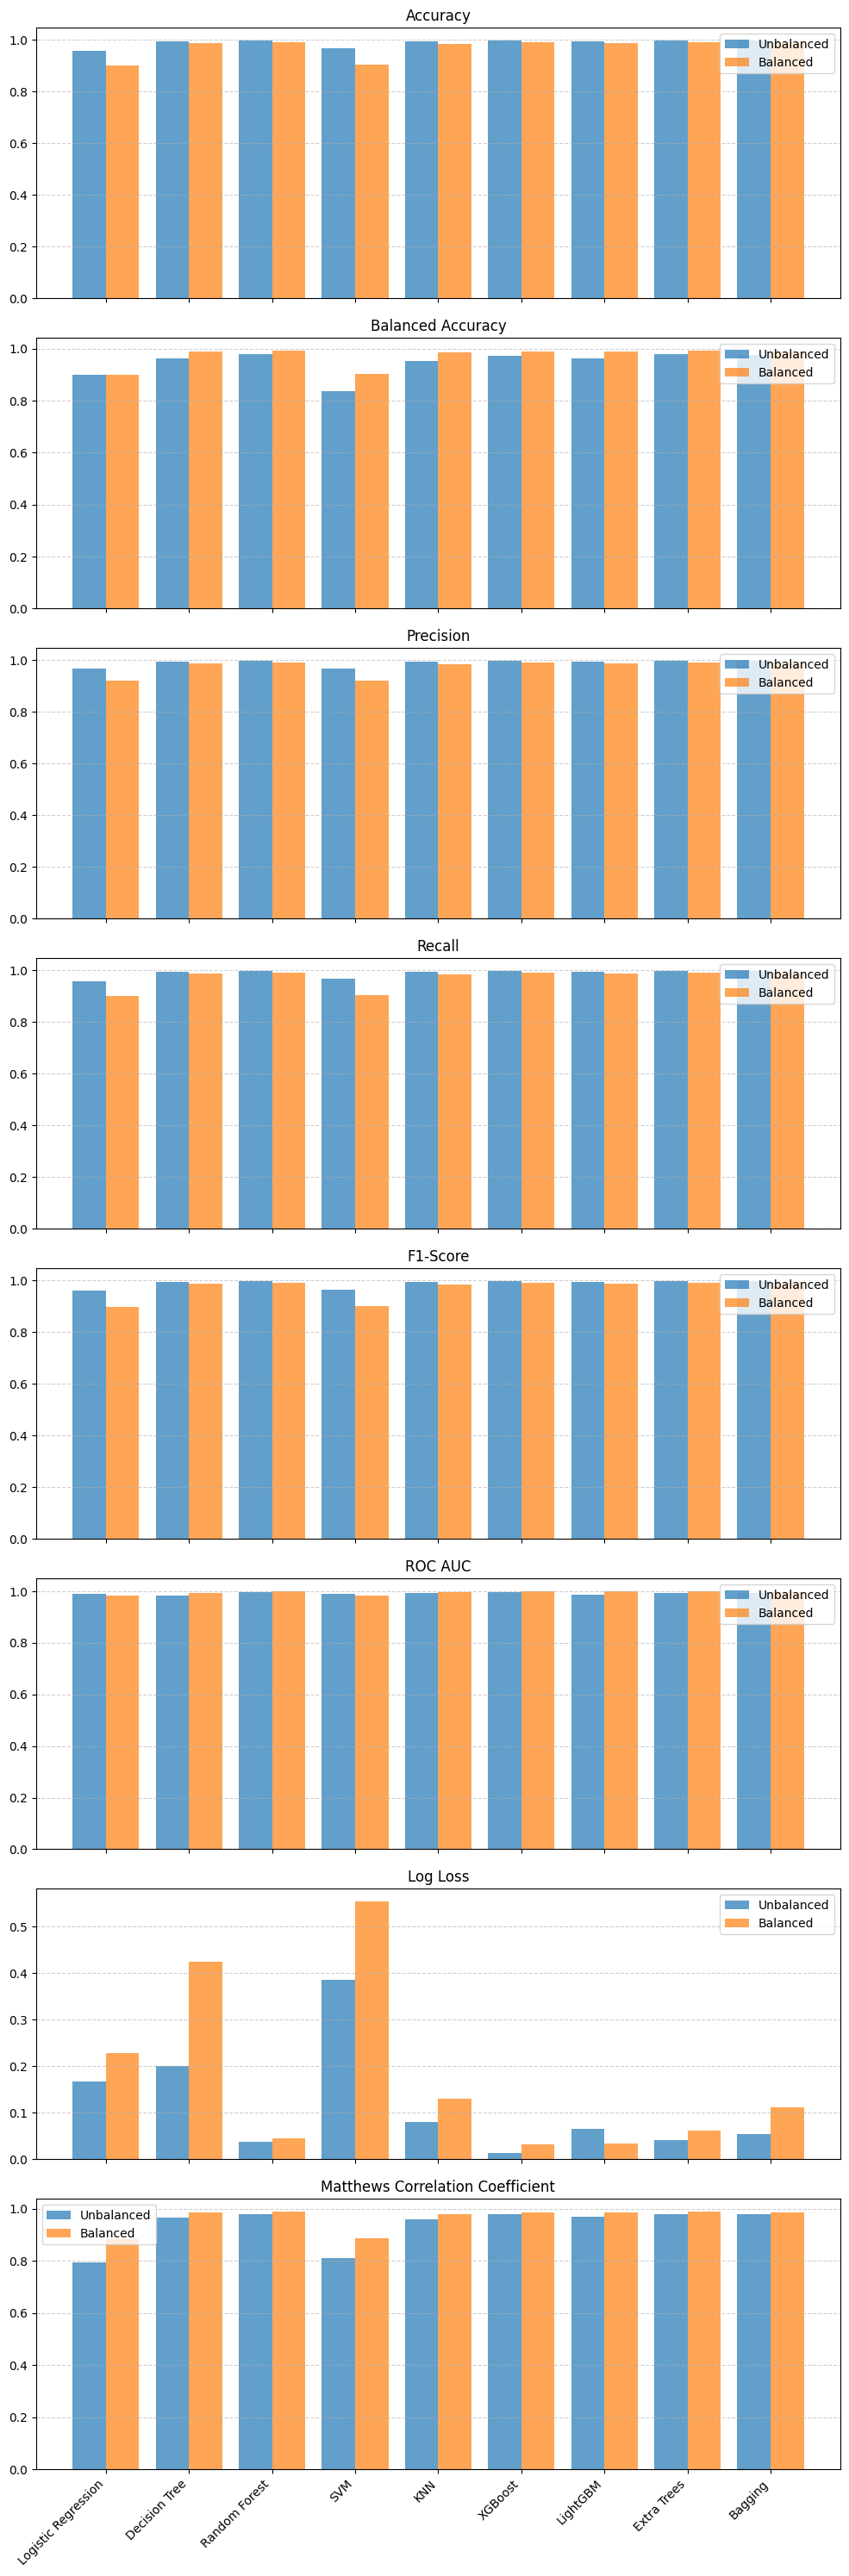

In [190]:
import numpy as np
import matplotlib.pyplot as plt

metrics_names = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'Log Loss', 'Matthews Correlation Coefficient']
models = list(metricsbal.keys())

unbalanced_metrics = {metric: [metricsunbal[model][metric] for model in models] for metric in metrics_names}
balanced_metrics = {metric: [metricsbal[model][metric] for model in models] for metric in metrics_names}

fig, axes = plt.subplots(len(metrics_names), 1, figsize=(10, 30), sharex=True)
for i, metric in enumerate(metrics_names):
    axes[i].bar(np.arange(len(models)) - 0.2, unbalanced_metrics[metric], width=0.4, label='Unbalanced', alpha=0.7)
    axes[i].bar(np.arange(len(models)) + 0.2, balanced_metrics[metric], width=0.4, label='Balanced', alpha=0.7)
    axes[i].set_title(metric)
    axes[i].set_xticks(np.arange(len(models)))
    axes[i].set_xticklabels(models, rotation=45, ha='right')
    axes[i].legend()
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
"""
TODO: 
    - run the random search for all the models and use the best hyperparameters for each model
    - run the models with the best hyperparameters and compare the results
"""

# import sklearn.metrics

# accuracyLGBM = sklearn.metrics.accuracy_score(TestOutput,ypred)
# balanced_accuracyLGBM = sklearn.metrics.balanced_accuracy_score(TestOutput, ypred)
# precisionLGBM = sklearn.metrics.precision_score(TestOutput, ypred, average='weighted')
# recallLGBM = sklearn.metrics.recall_score(TestOutput, ypred, average='weighted')
# f1LGBM = sklearn.metrics.f1_score(TestOutput, ypred, average='weighted')
# roc_aucLGBM = sklearn.metrics.roc_auc_score(TestOutput, ypredProba, average='weighted', multi_class='ovr')
# matthews_corrcoefLGBM = sklearn.metrics.matthews_corrcoef(TestOutput,ypred)

# print(f'{'accuracy': <30}', accuracyLGBM)
# print(f'{'balanced_accuracy': <30}', balanced_accuracyLGBM)
# print(f'{'precision': <30}', precisionLGBM)
# print(f'{'recall': <30}', recallLGBM)
# print(f'{'f1': <30}', f1LGBM)
# print(f'{'roc_auc': <30}', roc_aucLGBM)
# print(f'{'matthews_corrcoef': <30}', matthews_corrcoefLGBM)

# LogLossLGBM = sklearn.metrics.log_loss(TestOutput, ypredProba)
# print("Log Loss: ", LogLossLGBM)
# import sklearn.metrics

# plt.figure(figsize=(8, 6))
# for i in range(ConfusionMatrixLGBM.shape[0]):
#     fpr_i, tpr_i, _ = sklearn.metrics.roc_curve(TestOutput == i, ypredProba[:, i])
#     auc = sklearn.metrics.roc_auc_score(TestOutput == i, ypredProba[:, i])
#     plt.plot(fpr_i, tpr_i, label=f"Class {i} (AUC = {auc:.2f})")

# plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve for Multi-Class Logistic Regression")
# plt.legend()
# plt.grid()
# plt.show()